<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Predicting_California_Housing_Prices/blob/master/part_1_predicting_california_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We shall hard-code a Neural Network using python and use it to predict the price of houses in california. <br> 


The [Universal Function Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) states that a neural network with a single hidden layer and a finite number of neurons can approximate continous functions on compact subsets of data points in hyper-dimensional vector spaces, under mild assumptions of the activation function.

## **PART 1: The Needed Modules:**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.linear_model
import scipy
from PIL import Image
from scipy import ndimage
print('all modules imported!')

all modules imported!


## **PART 2: The Data and Preprocessing:**

In [75]:
california_train = pd.read_csv('sample_data/california_housing_train.csv')
california_test = pd.read_csv('sample_data/california_housing_test.csv')
print(f'Shape of training data is: {california_train.shape},\nShape of testing data is: {california_test.shape}')

Shape of training data is: (17000, 9),
Shape of testing data is: (3000, 9)


<h4><b>The Data Dictionary:</b></h4>

1. **longitude:** <br>A measure of how far west a house is; a higher value is farther west

2. **latitude:** <br>A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge:** <br>Median age of a house within a block; a lower number is a newer building

4. **totalRooms:** <br>Total number of rooms within a block

5. **totalBedrooms:** <br>Total number of bedrooms within a block

6. **population:** <br>Total number of people residing within a block

7. **households:** <br>Total number of households, a group of people residing within a home unit, for a block

8. **medianIncome:** <br>Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue:** <br>Median house value for households within a block (measured in US Dollars)


Let's see the heads of the training and testing sets.

In [76]:
california_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [77]:
california_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Let's inspect the training and testing data to ensure no missing values and each feature has the right data type.

In [78]:
california_train.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

No missing values in the training data set, let's confirm it has the right data types per feature

In [79]:
california_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Asesome! all data types have the right values. Let's do so for the Test data

In [80]:
california_test.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [81]:
california_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


<h4><b>2.1: Splitting and Re-shaping the data:</b></h4> 

So let's split the training and testing sets into sub train and test sets

In [82]:
# First let's make copies of the training and testing sets as numpy arrays
train_arr = california_train.values
test_arr = california_test.values

# Next, let's create the features and labels for both training and testing sets.
x_train, y_train = train_arr[:,:-1], train_arr[:,-1]
x_test, y_test = test_arr[:,:-1], test_arr[:,-1]

# Let's print the shapes of the training and testing labels
print(f'x_train shape is:- {x_train.shape} and y_train shape is {y_train.shape}.')
print(f'x_test shape is:- {x_test.shape} and y_test shape is {y_test.shape}.')

x_train shape is:- (17000, 8) and y_train shape is (17000,).
x_test shape is:- (3000, 8) and y_test shape is (3000,).


Next, let's reshape the training and testing sets to become a transpose of the current shape, but making sure we don't have rank-1 arrays in the process

In [83]:
x_train = x_train.reshape(x_train.shape[0], -1).T
y_train = y_train.reshape(y_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T
y_test = y_test.reshape(y_test.shape[0], -1).T

# Let's print out the shapes again
print(f'x_train shape is:- {x_train.shape} and y_train shape is {y_train.shape}.')
print(f'x_test shape is:- {x_test.shape} and y_test shape is {y_test.shape}.')

x_train shape is:- (8, 17000) and y_train shape is (1, 17000).
x_test shape is:- (8, 3000) and y_test shape is (1, 3000).




<h4><b>2.2: Feature Normalization:</b></h4>

Let's normalize the training sets. Let's use the Z-Score or standard score normalization. Let's define a Z_score method


In [84]:
def Z_score(x):
    """Compute z_score of a distribution.

    @param:
    x is an array or dataframe of ints or floats

    @Return:
    Returns z_score normalisation applied to x
    """
    mean = np.mean(x)
    std = np.std(x)
    zee_score = (x - mean) / std
    
    return zee_score

Now let's apply the z_score normalisation to the training sets

In [85]:
x_train_norm = np.apply_along_axis(Z_score, 1, x_train)
x_test_norm = np.apply_along_axis(Z_score, 1, x_test)

# Let's confirm they still have the same shape
print(x_train_norm.shape == x_train.shape)
print(x_test_norm.shape == x_test.shape)

True
True


In [86]:
# Let's see the first few elements of the x_train_norm array
x_train_norm[:5]

array([[ 2.619365  ,  2.53956878,  2.4946834 , ..., -2.36291168,
        -2.36291168, -2.387848  ],
       [-0.67152023, -0.57326437, -0.90546278, ...,  2.90780067,
         2.88908527,  2.29955006],
       [-1.07967114, -0.76187201, -0.92077158, ..., -0.92077158,
        -0.76187201,  1.85997083],
       [ 1.36169494,  2.29660752, -0.88246225, ...,  0.01529238,
         0.01299867, -0.377848  ],
       [ 1.76420407,  3.23044127, -0.86695622, ..., -0.01995512,
         0.02986848, -0.56801465]])

## **PART 3: Intro to Building a Neural Network From Scratch:**

<h4><b>Building a Logistic Regression model as a Neural Network</b></h4>

**Logistic Regression with a Neural Network mindset:**

I will build a logistic regression classifier as a Neural Network to predict housing prices

Steps Include:

1. Do not use loops (for/while) unless absolutely necessary
2. Build the general architecture of a learning algorithm, including:
Initializing parameters
3. Calculate the cost function and its gradient
4. Use an optimization algorithm (gradient descent)
5. Gather all three functions above into a main model function, in the right order.


<h4><b>Mathematical expression of the algorithm:</b></h4>

For one example $x^{(i)}$:$$z^{(i)} = w^T x^{(i)} + b $$$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

Key steps: In this exercise, we will carry out the following steps:

- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

<h2><b>Part 4: Building the parts of our algorithm</b></h2>

The main steps for building a Neural Network are:

1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
>>1. Calculate current loss (forward propagation)
>>2. Calculate current gradient (backward propagation)
>>3. Update parameters (gradient descent)

I will build 1-3 separately and integrate them into one function called a  model().

<h4><b>4.1: Initializing Parameters:</b></h4> 

We initialise the weights and bias parameters. The weights should take the shape of `(num_features, 1)`, while bias should be initialised to `0`. 

In [89]:
def initialise_params(x):
    """
    This function creates a vector of zeros of shape (x.shape[0], 1) for w and initializes b to 0.
    
    Argument:
    x -- an array of features
    
    Returns:
    w -- initialized vector of shape np.zeros((x.shape[0], 1))
    b -- initialized scalar (corresponds to the bias)
    """
    dim = x.shape[0]

    w = np.zeros((dim,1)) * 0.01
    
    b = 0

    # Let's run some assertions on the shape of w and type of b.
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

Let's test the initialise params function.
We shall create a random array of shape (5, 3), then apply the initialise_params function to it. We should get w of zeros of shape (5,1) and b of 0.

In [90]:
t = np.random.rand(5,3)
t

array([[0.41423502, 0.29607993, 0.62878791],
       [0.57983781, 0.5999292 , 0.26581912],
       [0.28468588, 0.25358821, 0.32756395],
       [0.1441643 , 0.16561286, 0.96393053],
       [0.96022672, 0.18841466, 0.02430656]])

In [91]:
w = initialise_params(t)[0]
b = initialise_params(t)[1]

# Let's see w and b
print(f'w =\n{w}\n\nb =\n{b}')

w =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]

b =
0


Let's confirm that t.shape[0] == w.shape[0]

In [92]:
t.shape[0] == w.shape[0]

True

In [93]:
assert w.shape == (5,1)
print('Yes! w.shape == (5,1)')

Yes! w.shape == (5,1)


<h4><b>4.2: Forward and Backward Propagation:</b></h4> 

Now that the parameters are initialized, I can do the "forward" and "backward" propagation steps for learning the parameters.

I need to Implement a function propagate() that computes the cost function and its gradient.

Cues:

**Forward Propagation:**

* I get X
* I compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
* I calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$<br>
Here are the two formulas I will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [267]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_features, 1)
    b -- bias, a scalar 
    X -- data of size (num_features, num_examples)
    Y -- true "label" vector (containing the true values of the houses) of size (1, num_examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]

    # Forward-prop from X to cost..
    A = np.dot(w.T, X) + b
    
    # Now we compute the cost using the mean absolute error
    cost = np.divide(np.sum(np.abs(A - Y)), m)


    # Backward-prop (to find grads)
    dw = np.multiply(1/m, np.dot(X, (A - Y).T))
    db = np.multiply(1/m, np.sum(A - Y))

    # Let's write some shape assertions
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {'dw':dw, 'db':db}

    return grads, cost

**Testing:** Let's test the propagate function above with some values

In [268]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[12.8       ]
 [30.82666667]]
db = 4.533333333333333
cost = 8.799999999999999


<h4><b>4.3 - Optimization:</h4></b>

So, I have initialized the parameters.
I have computed a cost function and its gradient.
Now I need to update the parameters using gradient descent.


The goal is to learn $w$ and $b$ by minimizing the cost function $J$. Therefore... <br>For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [270]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_features, 1)
    b -- bias, a scalar
    X -- data of shape (num_features, num_examples)
    Y -- true "label" vector (containing true values of the houses), of shape (1, num_examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the optimized weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    I basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        # retrieve derivatives from grads
        dw = grads['dw']
        db = grads['db']

        # update w and b based on derivatives
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Now let's record the costs per 100 iterations
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

**Testing:** Using the same values from the last test, let's test the optimize function.

In [271]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.04675219]
 [-0.12676061]]
b = 1.223758731602527
dw = [[ 0.12274692]
 [-0.09406359]]
db = 0.36833971156600487


**Exercise:** The previous function computes the learned $w$ and $b$ values. Therefore I can use these to predict the labels for a dataset X. in fact, let me define a predict() function. This basically takes one step:

Calculate $\hat{Y} = A = (w^T X + b)$

In [238]:
def predict(w, b, X):
    '''
    Predict the label for a given data set using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_features , 1)
    b -- bias, a scalar
    X -- data of size (num_features , num_examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    '''
    
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of the true label Y
    A = np.dot(w.T,X)+b
    
    # Let's write some assert statements
    assert(A.shape == (1, m))
    
    return A

**Testing:** Testing the predict function above

In [239]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 0.0897392   0.03843181 -0.6367585 ]]


<h2><b>Part 5: Merge all functions into a model:</b></h2>

Putting it all together... All the building blocks (functions implemented in the previous parts) together, in the right order.

I will Implement the model function. Using the following notations:

- y_prediction_test for my predictions on the test set
- y_prediction_train for my predictions on the train set
- w, costs, grads for the outputs of optimize()

In [303]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the functions implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_features, training_examples)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, training_examples)
    X_test -- test set represented by a numpy array of shape (num_features, testing_examples)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, testing_examples)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros
    w, b = np.zeros((X_train.shape[0], 1)), 0

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

<h3><b>5.1 Predictions</b></h3>

Finally, let's predict the housing prices using the training and testing data sets we normalised earlier. Passing these to the model we just assembled above. But first, let's re-confirm the shapes of these data

In [304]:
print(f'x_train_norm shape is {x_train_norm.shape}, y_train shape is {y_train.shape}')
print(f'x_test_norm shape is {x_test_norm.shape}, y_test shape is {y_test.shape}')

x_train_norm shape is (8, 17000), y_train shape is (1, 17000)
x_test_norm shape is (8, 3000), y_test shape is (1, 3000)


In [305]:
d = model(x_train_norm, y_train, x_test_norm, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 207300.912353
Cost after iteration 100: 125821.848848
Cost after iteration 200: 81771.408813
Cost after iteration 300: 63648.663785
Cost after iteration 400: 57563.991493
Cost after iteration 500: 55753.955521
Cost after iteration 600: 55214.119695
Cost after iteration 700: 55019.088525
Cost after iteration 800: 54863.793900
Cost after iteration 900: 54680.911681
Cost after iteration 1000: 54472.779383
Cost after iteration 1100: 54247.953898
Cost after iteration 1200: 54018.796698
Cost after iteration 1300: 53792.923362
Cost after iteration 1400: 53576.550766
Cost after iteration 1500: 53371.085142
Cost after iteration 1600: 53177.552701
Cost after iteration 1700: 52996.553391
Cost after iteration 1800: 52827.641276
Cost after iteration 1900: 52671.857265


<h3><b>5.2 Visualizing The Training Costs</b></h3>

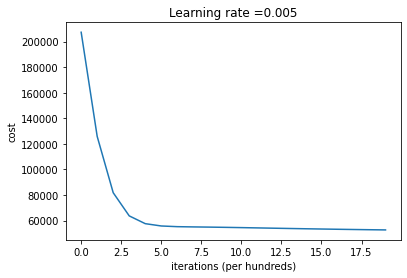

In [306]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

<h3><b>5.3 Evaluations</b></h3>

I will evaluate the model's performance using the Mean Absolute Error (MAE), Mean-Squared-Error(MSE) and Root-Mean-Squared-Error(RMSE)

**Mean Absolute Error (MAE):**

In [316]:
def mean_absolute_error(y_true, y_pred):

    abs_error = np.abs(y_true - y_pred)
    sum_abs_error = np.sum(abs_error)
    mae = sum_abs_error / y_true.shape[1]

    return mae

Let's see the Mean Absolute Errors

In [318]:
print(f'MAE for train set is {np.round(mean_absolute_error(y_train, d["Y_prediction_train"]),2)} and MAE for test set is {np.round(mean_absolute_error(y_test, d["Y_prediction_test"]),2)}')

MAE for train set is 52526.75 and MAE for test set is 52255.09


**2. Mean Squared Error (MSE):**

In [312]:
def mean_squared_error(y_true, y_pred):

    squared_error = (y_true - y_pred)**2
    sum_squared_error = np.sum(squared_error)
    mse = sum_squared_error / y_true.shape[1]

    return mse

Let's see the Mean Squared Errors...

In [319]:
print(f'MSE for train set is {np.round(mean_squared_error(y_train, d["Y_prediction_train"]),2)} and MSE for test set is {np.round(mean_squared_error(y_test, d["Y_prediction_test"]),2)}')

MSE for train set is 5132743901.45 and MSE for test set is 5149507690.93


3. **Root Mean Squared Error (RMSE):**

In [320]:
def root_mean_squared_error(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    return rmse

Let's see the Root Mean Squared Errors...

In [321]:
print(f'RMSE for train set is {np.round(root_mean_squared_error(y_train, d["Y_prediction_train"]),2)} and RMSE for test set is {np.round(root_mean_squared_error(y_test, d["Y_prediction_test"]),2)}')

RMSE for train set is 71643.17 and MSE for test set is 71760.07


<b><h4>5.4 Compare the RMSE to the Range of the Target Variable</b></h4>

In [326]:
def rmse_range(y_true, y_pred):

    # Find range of the target variable
    target_range = np.ptp(y_true, axis=1)[0]

    # Find RMSE
    rmse = root_mean_squared_error(y_true, y_pred)

    # RMSE as percent of target range
    rmse_pct_range = (rmse / target_range) * 100

    return rmse_pct_range

In [327]:
print(f'RMSE_target range for train set is {np.round(rmse_range(y_train, d["Y_prediction_train"]),2)} and RMSE_target_range for test set is {np.round(rmse_range(y_test, d["Y_prediction_test"]),2)}')

RMSE_target range for train set is 14.77 and RMSE_target_range for test set is 15.03


Next: Show a dist plot of the predicted values versus the real values for both training and testing sets. Use the seaborn library if possible